In [3]:
#forward calculation for pumping (2D)
from scipy.optimize import least_squares
import numpy as np
import scipy
from scipy import special
from numpy.polynomial.hermite import hermfit,hermval
from numpy.polynomial.polynomial import polyfit 
import matplotlib.pyplot as plt
import math
from scipy.signal import savgol_filter
from scipy.optimize import differential_evolution
from scipy.optimize import minimize

def fun_der(lk,r,q,ta,s,t,r0):
    t_len=len(t); r_len=len(r); ini_len=len(r0)
    rcoe=np.zeros((ini_len+t_len*r_len,400*2))
    ycoe=np.zeros(ini_len+t_len*r_len)
# Initial Condition
    for ik in range(ini_len):
        rk=r0[ik]
        for jk in range(1,401):
            vk=jk*1.0*np.pi/lk
            nk=(jk-1)*2
            rcoe[ik,nk+0]=scipy.special.jv(0,rk*vk)
            rcoe[ik,nk+1]=scipy.special.yv(0,rk*vk)
        ycoe[ik]=52.0
# Boundary Condition
    nk_f=ini_len
    for ik in range(t_len):
        tk=t[ik]
        rk=r[0]
        for jk in range(1,401):
            vk=jk*1.0*np.pi/lk
            nk=(jk-1)*2
            t_term=np.exp(-vk*vk*ta/s*tk)
            rcoe[nk_f,nk+0]=t_term*scipy.special.jvp(0,rk*vk)*vk
            rcoe[nk_f,nk+1]=t_term*scipy.special.yvp(0,rk*vk)*vk
        ycoe[nk_f]=+q/2.0/np.pi/rk/1.0
        nk_f=nk_f+1
        
        rk=r[1]
        for jk in range(1,401):
            vk=jk*1.0*np.pi/lk
            nk=(jk-1)*2
            t_term=np.exp(-vk*vk*ta/s*tk)
            rcoe[nk_f,nk+0]=t_term*scipy.special.jv(0,rk*vk)
            rcoe[nk_f,nk+1]=t_term*scipy.special.yv(0,rk*vk)
        ycoe[nk_f]=52.0
        nk_f=nk_f+1
        
    ck=np.linalg.lstsq(rcoe,ycoe,rcond=None)[0]
    
# Calculate the residual
    resk1=np.zeros(ini_len+t_len*r_len)
# Initial Condition
    for ik in range(ini_len):
        rk=r0[ik]
        for jk in range(1,401):
            vk=jk*1.0*np.pi/lk
            nk=(jk-1)*2
            resk1[ik]=resk1[ik]+ck[nk+0]*scipy.special.jv(0,rk*vk)
            resk1[ik]=resk1[ik]+ck[nk+1]*scipy.special.yv(0,rk*vk)
        resk1[ik]=resk1[ik]-52.0
# Boundary Condition
    nk_f=ini_len
    for ik in range(t_len):
        tk=t[ik]
        rk=r[0]
        for jk in range(1,401):
            vk=jk*1.0*np.pi/lk
            nk=(jk-1)*2
            t_term=np.exp(-vk*vk*ta/s*tk)
            resk1[nk_f]=resk1[nk_f]+ck[nk+0]*t_term*scipy.special.jvp(0,rk*vk)*vk
            resk1[nk_f]=resk1[nk_f]+ck[nk+1]*t_term*scipy.special.yvp(0,rk*vk)*vk
        resk1[nk_f]=resk1[nk_f]-q/2.0/np.pi/rk/1.0
        nk_f=nk_f+1
        
        rk=r[1]
        for jk in range(1,401):
            vk=jk*1.0*np.pi/lk
            nk=(jk-1)*2
            t_term=np.exp(-vk*vk*ta/s*tk)
            resk1[nk_f]=resk1[nk_f]+ck[nk+0]*t_term*scipy.special.jv(0,rk*vk)
            resk1[nk_f]=resk1[nk_f]+ck[nk+1]*t_term*scipy.special.yv(0,rk*vk)
        resk1[nk_f]=resk1[nk_f]-52.0
        nk_f=nk_f+1
    print (sum(resk1*resk1))
    return ck,rcoe,ycoe
r0=np.zeros(1000)
r0[0]=0.15
for ik in range(1,1000):
    r0[ik]=ik*1.0
r=np.zeros(2)
r[0]=0.1; r[1]=1000.0
t=np.zeros(100)
for ik in range(100):
    t[ik]=(ik+1)*0.1
lk=10000.0
[ck,rcoe,ycoe]=fun_der(lk,r,1.0,1.0,0.01,t,r0)

0.14889852759551947


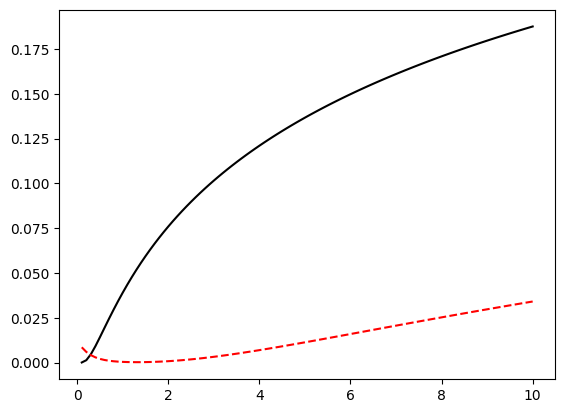

In [6]:
t=np.zeros(100)
for ik in range(100):
    t[ik]=(ik+1)*0.1
s=np.zeros(100)
for ik in range(100):
    u=15.0*15.0*0.01/4.0/1.0/t[ik]
    w=-0.5772-np.log(u)
    for jk in range(1,100):
        w=w-((-1.0)**(jk))*(u**jk)/(jk*1.0)/np.math.factorial(jk)
    s[ik]=1.0/4.0/np.pi/1.0*w
plt.plot(t,s,'k-')
s1=np.zeros(100)
ta=1.0; ss=0.01
r0=np.zeros(1000)
r0[0]=0.1
for ik in range(1,1000):
    r0[ik]=ik*1.0
for ik in range(100):
    rkk=50.0; tk=t[ik]
    for jk in range(1,401):
        vk=jk*1.0*np.pi/lk
        nk=(jk-1)*2
        t_term=np.exp(-vk*vk*ta/ss*tk)
        s1[ik]=s1[ik]+ck[nk+0]*t_term*scipy.special.jv(0,rkk*vk)
        s1[ik]=s1[ik]+ck[nk+1]*t_term*scipy.special.yv(0,rkk*vk)
    s1[ik]=s1[ik]
            
plt.plot(t,52.0-s1,'r--')